Name: Başar Demir

Student Number: 150180080

In [54]:
#imports necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold

In [55]:
#reads csv files as dataframes 
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 

## Part A: Examine training sets

### Mean and Covariance Matrix Calculation

In [56]:
#Function that calculates means of the features according to given class
def mean_matrix(features, labels, cls):
    concated_data = np.concatenate((features, labels), axis=1)
    data_cls = concated_data[concated_data[:,2]==cls]
    feature1 = data_cls[:,0]
    feature1_mean = np.mean(feature1)
    feature2 = data_cls[:,1]
    feature2_mean = np.mean(feature2)
    return np.array([[feature1_mean],[feature2_mean]] )

#Function that calculates covariance of the features according to given class
def covariance_matrix(features, labels, cls):
    concated_data = np.concatenate((features, labels), axis=1)
    data_cls = concated_data[concated_data[:,2]==cls]
    cov_mtrx = []
    row_num, col_num = np.shape(data_cls)
    for i in range(col_num-1):
        row = []
        array1 = data_cls[:,i]
        array1_mean = np.mean(array1)
        array1_minus_mean = array1 - array1_mean
        for j in range(col_num-1):
            array2 = data_cls[:,j]
            array2_mean = np.mean(array2)
            array2_minus_mean = array2 - array2_mean
            x2_minus_mean_transpose = np.transpose(array2_minus_mean)
            mul=np.matmul(array1_minus_mean, x2_minus_mean_transpose)/row_num
            row.append(mul)
        cov_mtrx.append(row)
    return np.array(cov_mtrx)

### Covariance Matrices for Dataset-1

Covariance matrix for Class 0:
[[0.30779503 0.20875556]
 [0.20875556 0.403941  ]]
<ipython-input-57-e45df4d3074c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
<ipython-input-57-e45df4d3074c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


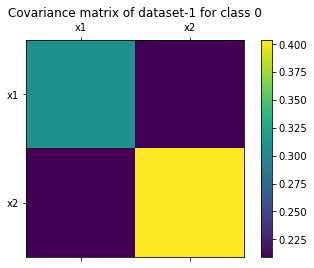

Covariance matrix for Class 1:
[[0.30779503 0.20875556]
 [0.20875556 0.403941  ]]
<ipython-input-57-e45df4d3074c>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
<ipython-input-57-e45df4d3074c>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


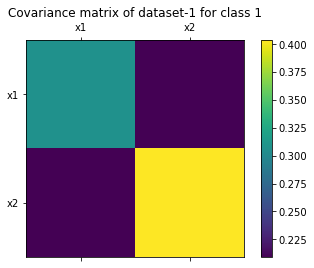

In [57]:
#Extracts features and labels from dataset-1
df1_features = df1[['x1','x2']]
df1_labels = df1[['y']]
alpha = ['x1', 'x2']


#Calculates covariance matrix for class 0
cov_mtrx_0 = covariance_matrix(df1_features, df1_labels, 0)
print("Covariance matrix for Class 0:")
print(cov_mtrx_0)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx_0,interpolation='nearest')
plt.gca().set(title='Covariance matrix of dataset-1 for class 0')
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
plt.show()


#Calculates covariance matrix for class 1
cov_mtrx_1 = covariance_matrix(df1_features, df1_labels ,1)
print("Covariance matrix for Class 1:")
print(cov_mtrx_1)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx_1, interpolation='nearest')
plt.gca().set(title='Covariance matrix of dataset-1 for class 1')
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
plt.show()

Both classes have same covariance values. 

Standard deviation of x2 is bigger than x1 and this means that x2 has wider distribution on plane.   

Covariance between features are positive, increase in one feature value causes increase in other feature or vice versa. Also value of covariance between features is near to 0 but not 0, it shows they are related with each other but this relation is not too strong.
 


### Covariance Matrices for Dataset-2

Covariance matrix for Class 0:
[[0.29913689 0.19183728]
 [0.19183728 0.3972486 ]]
<ipython-input-58-045d2a5c4878>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
<ipython-input-58-045d2a5c4878>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


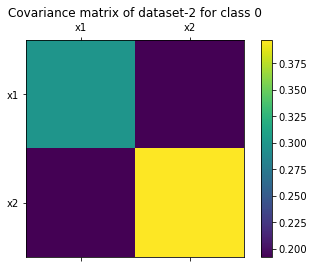

Covariance matrix for Class 1:
[[0.77441134 0.08920795]
 [0.08920795 0.52736643]]
<ipython-input-58-045d2a5c4878>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
<ipython-input-58-045d2a5c4878>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


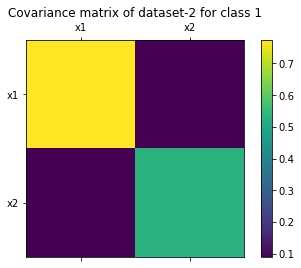

In [58]:
#extracts features and labels from dataset-1
df2_features = df2[['x1','x2']]
df2_labels = df2[['y']]
alpha = ['x1', 'x2']

##################################################################
#Calculates covariance matrix for class 0
cov_mtrx = covariance_matrix(df2_features, df2_labels, 0)
print("Covariance matrix for Class 0:")
print(cov_mtrx)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx,interpolation='nearest') 
plt.gca().set(title='Covariance matrix of dataset-2 for class 0')
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
plt.show()

##################################################################
#Calculates covariance matrix for class 1
cov_mtrx = covariance_matrix(df2_features, df2_labels, 1)
print("Covariance matrix for Class 1:")
print(cov_mtrx)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx,interpolation='nearest') 
plt.gca().set(title='Covariance matrix of dataset-2 for class 1')
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
plt.show()

Classes have different covariance matrices.

For class 0:

Standard deviation of x2 is bigger than x1 and this means that x2 has wider distribution on plane.   

Covariance between features are positive, increase in one feature value causes increase in other feature or vice versa. Also value of covariance between features is near to 0 but not 0, it shows they are related with each other.

For class 1:

Standard deviation of x1 is bigger than x2 and this means that x1 has wider distribution on plane.   

Covariance between features are positive, increase in one feature value causes increase in other feature or vice versa. Also value of covariance between features is near to 0 but not 0, it shows they are related with each other. But this relation is weaker than relation between x1 and x2 for class 0.

Comparison:

Distribution of the x1 and x2 features is wider in class 1 also relation between features is weaker respect to class 0.

### Histograms for Dataset-1

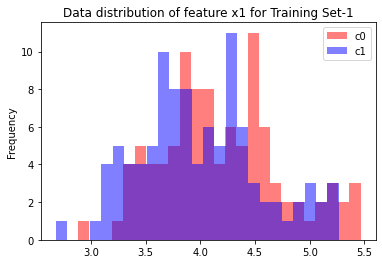

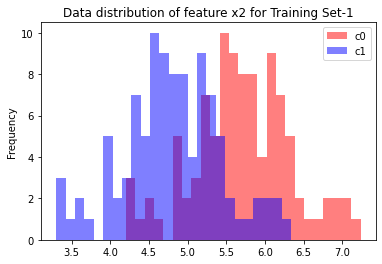

In [59]:
#Analyzes each feature from each class
df1_class0 = df1[df1['y']==0]
df1_class0_x1 = df1_class0['x1'].values
df1_class0_x2 = df1_class0['x2'].values

df1_class1 = df1[df1['y']==1]
df1_class1_x1 = df1_class1['x1'].values
df1_class1_x2 = df1_class1['x2'].values


fig = plt.figure()
#Plots x1 values that are in class 0 and class 1 separately
plt.hist(df1_class0_x1,bins=25, alpha=0.5, color="red")
plt.hist(df1_class1_x1,bins=25,  alpha=0.5, color="blue")

plt.legend(["c0", "c1"])
plt.gca().set(title='Data distribution of feature x1 for Training Set-1', ylabel='Frequency')
plt.show()


fig = plt.figure()
#Plots x2 values that are in class 0 and class 1 separately
plt.hist(df1_class0_x2,bins=25, alpha=0.5, color="red")
plt.hist(df1_class1_x2,bins=25,  alpha=0.5, color="blue")

plt.legend(["c0", "c1"])
plt.gca().set(title='Data distribution of feature x2 for Training Set-1', ylabel='Frequency')
plt.show()



Distributions of x1 for each class are similar in terms of mean and interval, this condition can cause harder classification. x1 values can be similar in both classes. There is high overlapping.  

Distribution histograms for x2 is more separable and wider but it is not good distribution for classification.

### Histograms for Dataset-2

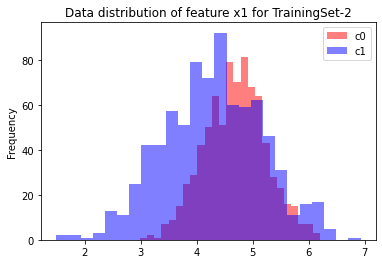

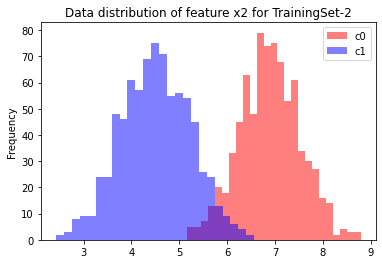

In [60]:
#Analyzes each feature from each class
df2_class0 = df2[df2['y']==0]
df2_class0_x1 = df2_class0['x1'].values
df2_class0_x2 = df2_class0['x2'].values

df2_class1 = df2[df2['y']==1]
df2_class1_x1 = df2_class1['x1'].values
df2_class1_x2 = df2_class1['x2'].values

fig = plt.figure()
#Plots x1 values that are in class 0 and class 1 separately
plt.hist(df2_class0_x1,bins=25, alpha=0.5, color="red")
plt.hist(df2_class1_x1,bins=25,  alpha=0.5, color="blue")

plt.legend(["c0", "c1"])
plt.gca().set(title='Data distribution of feature x1 for TrainingSet-2', ylabel='Frequency')
plt.show()

fig = plt.figure()
#Plots x2 values that are in class 0 and class 1 separately
plt.hist(df2_class0_x2,bins=25, alpha=0.5, color="red")
plt.hist(df2_class1_x2,bins=25,  alpha=0.5, color="blue")

plt.legend(["c0", "c1"])
plt.gca().set(title='Data distribution of feature x2 for TrainingSet-2', ylabel='Frequency')
plt.show()


Feature x1 gives similar distribution for class-0 and class-1. Class-0 almost locates inside of the class-1. It is hard to separate and classify.

Feature x2 has good distribution for classification. Their means and interval are not close to each other. Classes have small overlap in the histogram and it makes classification easier.


### Plot for Dataset-1

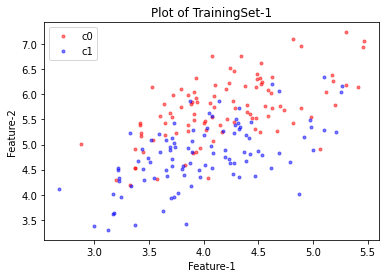

In [61]:
fig = plt.figure()
plt.plot(df1_class0_x1, df1_class0_x2, '.', color="red",  alpha=0.5)
plt.plot(df1_class1_x1, df1_class1_x2,  '.', color="blue" ,alpha=0.5)
plt.gca().set(title='Plot of TrainingSet-1', ylabel='Feature-2', xlabel="Feature-1")
plt.legend(["c0", "c1"])
plt.show()


### Plot for Dataset-2

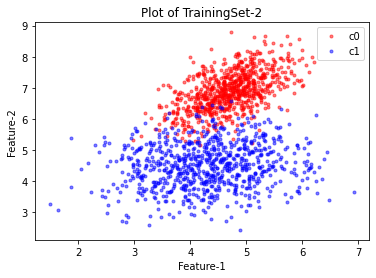

In [62]:
fig = plt.figure()
plt.plot(df2_class0_x1, df2_class0_x2, '.', color="red",  alpha=0.5)
plt.plot(df2_class1_x1, df2_class1_x2,  '.', color="blue" ,alpha=0.5)
plt.gca().set(title='Plot of TrainingSet-2', ylabel='Feature-2', xlabel="Feature-1")
plt.legend(["c0", "c1"])
plt.show()

## Part B: Evaluation of Bayes classifier

### Dataset-1 Mean Vector and Covariance Matrix

In [63]:
print("Mean Vector for Class-1:")
print(mean_matrix(df1_features, df1_labels , 0).T)
print("\nMean Vector for Class-2:")
print(mean_matrix(df1_features, df1_labels , 1).T)
print("\nCovariance Matrix for Class-1:")
print(covariance_matrix(df1_features, df1_labels , 0))
print("\nCovariance Matrix for Class-2:")
print(covariance_matrix(df1_features, df1_labels , 1))


Mean Vector for Class-1:
[[4.2 5.7]]

Mean Vector for Class-2:
[[4.  4.8]]

Covariance Matrix for Class-1:
[[0.30779503 0.20875556]
 [0.20875556 0.403941  ]]

Covariance Matrix for Class-2:
[[0.30779503 0.20875556]
 [0.20875556 0.403941  ]]


### Dataset-2 Mean Vector and Covariance Matrix

In [64]:
print("Mean Vector for Class-1:")
print(mean_matrix(df2_features, df2_labels , 0).T)
print("\nMean Vector for Class-2:")
print(mean_matrix(df2_features, df2_labels , 1).T)
print("\nCovariance Matrix for Class-1:")
print(covariance_matrix(df2_features, df2_labels , 0))
print("\nCovariance Matrix for Class-2:")
print(covariance_matrix(df2_features, df2_labels , 1))


Mean Vector for Class-1:
[[4.69156024 6.8893364 ]]

Mean Vector for Class-2:
[[4.29725029 4.50444121]]

Covariance Matrix for Class-1:
[[0.29913689 0.19183728]
 [0.19183728 0.3972486 ]]

Covariance Matrix for Class-2:
[[0.77441134 0.08920795]
 [0.08920795 0.52736643]]


### Bayes Classifier


In [65]:
#Class Definition for Bayes Classifier

#I have used pinv method that is in numpy library, it calculates Moore–Penrose inverse 
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html

class BayesClassifier():
    #Constructor that sets required variables as None
    def __init__(self):
        self.W0 = None
        self.wit0 = None
        self.wi0 = None
        self.W1 = None
        self.wit1 = None
        self.wi1 = None
        self.isGeneral = True
    
    #Function that trains Bayes and calculates required variables
    def trainBayes (self, trainingSamples, trainingLabels) :
        cov_0 = np.array(covariance_matrix(trainingSamples,trainingLabels, 0))
        cov_1 = covariance_matrix(trainingSamples,trainingLabels, 1)

        mean_0 = np.array(mean_matrix(trainingSamples,trainingLabels, 0))
        mean_1 = mean_matrix(trainingSamples,trainingLabels, 1)
        x_0 = len(trainingLabels[trainingLabels[:,:]==0])
        x_1 = len(trainingLabels[trainingLabels[:,:]==1])

        mean0_transpose = np.transpose(mean_0)
        mean1_transpose = np.transpose(mean_1)

        if np.allclose(cov_0, cov_1): #Case 1: Equal Covariances
            self.isGeneral = False

            if np.linalg.det(cov_0) != 0:
                inverse_cov = np.linalg.inv(cov_0) 
            else:
                inverse_cov = np.linalg.pinv(cov_0) 
            
            self.wit0 = np.matmul(mean0_transpose,inverse_cov)
            self.wit1 = np.matmul(mean1_transpose,inverse_cov)
            self.wi0 = np.log(x_0/(x_0+x_1)) - (1/2)*np.matmul(np.matmul(np.transpose(mean_0),inverse_cov),mean_0)
            self.wi1 = np.log(x_1/(x_0+x_1)) - (1/2)*np.matmul(np.matmul(np.transpose(mean_1),inverse_cov),mean_1)
        else: #Case2: General Case
            self.isGeneral =True

            if np.linalg.det(cov_0) != 0:
                inverse_cov0 = np.linalg.inv(cov_0) 
            else:
                inverse_cov0 = np.linalg.pinv(cov_0) 

            if np.linalg.det(cov_1) != 0:
                inverse_cov1 = np.linalg.inv(cov_1) 
            else:
                inverse_cov1 = np.linalg.pinv(cov_1)
            
            self.W0 = (-1/2)*inverse_cov0
            self.W1 = (-1/2)*inverse_cov1

            self.wit0= np.matmul(mean0_transpose,inverse_cov0)
            self.wit1= np.matmul(mean1_transpose ,inverse_cov1)

            self.wi0= (-1/2)*np.matmul(np.matmul(mean0_transpose,inverse_cov0),mean_0) + (-1/2)*np.log(np.linalg.det(cov_0))+np.log(x_0/(x_0+x_1)) 
            self.wi1= (-1/2)*np.matmul(np.matmul(mean1_transpose,inverse_cov1),mean_1) + (-1/2)*np.log(np.linalg.det(cov_1))+np.log(x_1/(x_0+x_1))

    #Function that returns predicted output for given x features
    def predict(self,x):
        if self.isGeneral == False: #Prediction for Case-1
            g0_x = np.matmul(self.wit0, x) + self.wi0
            g1_x = np.matmul(self.wit1, x) + self.wi1
            if g0_x > g1_x:
                return 0
            else:
                return 1
        else: #Prediction for Case-2
            x_transpose = np.transpose(x)
            g0_x = np.matmul(np.matmul(x_transpose,self.W0),x)+ np.matmul(self.wit0,x) +self.wi0
            g1_x = np.matmul(np.matmul(x_transpose,self.W1),x)+ np.matmul(self.wit1,x) +self.wi1
            if g0_x > g1_x:
                return 0
            else:    
                return 1
    #Function that tests classification and returns error rate
    def test(self, test_features, test_labels):
        row_num, col_num = np.shape(test_features)
        results=[]
        for i in range(row_num):
            value = test_features[i,:]
            results.append(self.predict(value))

        number_of_samples = 0
        error = 0
        for i in range(row_num):
            if(results[i] != test_labels[i,:] ):
                error+=1
            number_of_samples+=1
        print("Test Error Rate = " +str(error/number_of_samples*100)+"%")
        return error/number_of_samples*100

### Training and Testing for Dataset-1

In [66]:
test1 = pd.read_csv("test1.csv")
classifier1 = BayesClassifier()
classifier1.trainBayes(df1_features.values, df1_labels.values)
error = classifier1.test(test1.values[:,:2],test1.values[:,2:3])

Test Error Rate = 20.0%


### Training and Testing for Dataset-2

In [67]:
test2 = pd.read_csv("test2.csv")
classifier2 = BayesClassifier()
classifier2.trainBayes(df2_features.values, df2_labels.values)
error = classifier2.test(test2.values[:,:2],test2.values[:,2:3])

Test Error Rate = 3.0%


## Part C: Evaluation of Bayes classifier using K-Fold

### Training and Testing for Dataset-1 with K-Fold

In [68]:
from sklearn.model_selection import KFold
#concatenates test and training datasets
df1_concated = np.concatenate((df1.values, test1.values))

#Extracts features and labels
X = df1_concated[:,0:2]
y = df1_concated[:,2:3]

#Gives seed as 1773
random.seed(1773)

#Creates 3-Fold
kf = KFold(n_splits=3,shuffle=True, random_state=1773)
kf.get_n_splits(X)

errors=0
index=1
#iterates over train and test sets and performs classification
for train_index, test_index in kf.split(X):
    print("Fold-"+str(index)+":")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Mean Vector for Class-1:")
    print(mean_matrix(X_train, y_train , 0).T)
    print("\nMean Vector for Class-2:")
    print(mean_matrix(X_train, y_train , 1).T)
    print("\nCovariance Matrix for Class-1:")
    print(covariance_matrix(X_train, y_train , 0))
    print("\nCovariance Matrix for Class-2:")
    print(covariance_matrix(X_train, y_train , 1))
    classifier = BayesClassifier()
    classifier.trainBayes(X_train, y_train)
    error = classifier.test(X_test,y_test)
    print()
    errors+=error
    index+=1

print("Dataset-1 Average Error Rate = " +str(errors/3)+"%")

Fold-1:
Mean Vector for Class-1:
[[4.21685337 5.65793425]]

Mean Vector for Class-2:
[[3.97302434 4.76658597]]

Covariance Matrix for Class-1:
[[0.28767287 0.21382917]
 [0.21382917 0.42567009]]

Covariance Matrix for Class-2:
[[0.27394362 0.20781445]
 [0.20781445 0.37045223]]
Test Error Rate = 18.0%

Fold-2:
Mean Vector for Class-1:
[[4.18810461 5.71915992]]

Mean Vector for Class-2:
[[3.9873125  4.76202164]]

Covariance Matrix for Class-1:
[[0.29144515 0.20229309]
 [0.20229309 0.39205132]]

Covariance Matrix for Class-2:
[[0.31799391 0.23299056]
 [0.23299056 0.44411219]]
Test Error Rate = 23.0%

Fold-3:
Mean Vector for Class-1:
[[4.19511209 5.72294367]]

Mean Vector for Class-2:
[[4.03914483 4.87030951]]

Covariance Matrix for Class-1:
[[0.30632318 0.22167903]
 [0.22167903 0.38576166]]

Covariance Matrix for Class-2:
[[0.29163439 0.19200394]
 [0.19200394 0.38469983]]
Test Error Rate = 18.0%

Dataset-1 Average Error Rate = 19.666666666666668%


### Training and Testing for Dataset-2 with K-Fold

In [69]:
#concatenates test and training datasets
df2_concated = np.concatenate(( df2.values, test2.values))

#Extracts features and labels
X = df2_concated[:,0:2]
y = df2_concated[:,2:3]

#Gives seed as 1773
random.seed(1773)

#Creates 3-Fold
kf = KFold(n_splits=3,shuffle=True, random_state=1773)
kf.get_n_splits(X)

errors=0
index=1
#iterates over train and test sets and performs classification
for train_index, test_index in kf.split(X):
    print("Fold-"+str(index)+":")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Mean Vector for Class-1:")
    print(mean_matrix(X_train, y_train , 0).T)
    print("\nMean Vector for Class-2:")
    print(mean_matrix(X_train, y_train , 1).T)
    print("\nCovariance Matrix for Class-1:")
    print(covariance_matrix(X_train, y_train , 0))
    print("\nCovariance Matrix for Class-2:")
    print(covariance_matrix(X_train, y_train , 1))
    classifier = BayesClassifier()
    classifier.trainBayes(X_train, y_train)
    print()
    error = classifier.test(X_test,y_test)
    print()
    errors+=error
    index+=1

print("Dataset-2 Average Error Rate = " +str(errors/3)+"%")

Fold-1:
Mean Vector for Class-1:
[[4.69037798 6.88044606]]

Mean Vector for Class-2:
[[4.33508966 4.47279835]]

Covariance Matrix for Class-1:
[[0.30303991 0.20212036]
 [0.20212036 0.41601273]]

Covariance Matrix for Class-2:
[[0.83994731 0.07856867]
 [0.07856867 0.53273553]]

Test Error Rate = 3.1484257871064467%

Fold-2:
Mean Vector for Class-1:
[[4.70288698 6.89161534]]

Mean Vector for Class-2:
[[4.30326171 4.51272046]]

Covariance Matrix for Class-1:
[[0.294153   0.18489565]
 [0.18489565 0.399771  ]]

Covariance Matrix for Class-2:
[[0.77500282 0.09020163]
 [0.09020163 0.52194331]]

Test Error Rate = 3.4482758620689653%

Fold-3:
Mean Vector for Class-1:
[[4.7165986  6.90978681]]

Mean Vector for Class-2:
[[4.29869134 4.51182726]]

Covariance Matrix for Class-1:
[[0.30731075 0.17593103]
 [0.17593103 0.38321313]]

Covariance Matrix for Class-2:
[[0.74391982 0.10490051]
 [0.10490051 0.5444722 ]]

Test Error Rate = 2.8528528528528527%

Dataset-2 Average Error Rate = 3.1498515006760877

### Comparison

Errors that were obtained from 3-Fold Cross Validation are smaller than random single split of the dataset. But if we observe error of each fold separately, some errors are greater than single split error. This situation shows that single split is not a realiable evaluation strategy. In single split, error rate highly depends on variety of data in train and test set. By using K-Fold, we can obtain error rates from different randomized train and test sets; it allows us to test our method in different cases. We obtain more reliable error rate by taking average of these error rates.






## Part D: Evaluation of Bayes classifier on Dataset2_modified

### Plot of Modified Training Set

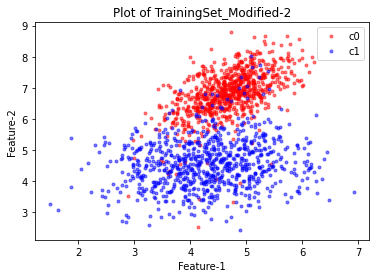

In [70]:
#Reads modified training set and extracts features and labels
df2m = pd.read_csv("train2_modified.csv")
df2m_class0 = df2m[df2m['y']==0]
df2m_class0_x1 = df2m_class0['x1'].values
df2m_class0_x2 = df2m_class0['x2'].values

df2m_class1 = df2m[df2m['y']==1]
df2m_class1_x1 = df2m_class1['x1'].values
df2m_class1_x2 = df2m_class1['x2'].values

fig = plt.figure()
plt.plot(df2m_class0_x1, df2m_class0_x2, '.', color="red",  alpha=0.5)
plt.plot(df2m_class1_x1, df2m_class1_x2,  '.', color="blue" ,alpha=0.5)
plt.gca().set(title='Plot of TrainingSet_Modified-2', ylabel='Feature-2', xlabel="Feature-1")
plt.legend(["c0", "c1"])
plt.show()

### Bayes Classification on Modified Training Set

In [71]:
df2m_features = df2m[['x1','x2']]
df2m_labels = df2m[['y']]

print("Mean Vector for Class-1:")
print(mean_matrix(df2m_features, df2m_labels , 0).T)
print("\nMean Vector for Class-2:")
print(mean_matrix(df2m_features, df2m_labels , 1).T)
print("\nCovariance Matrix for Class-1:")
print(covariance_matrix(df2m_features, df2m_labels , 0))
print("\nCovariance Matrix for Class-2:")
print(covariance_matrix(df2m_features, df2m_labels , 1))
print()

classifierm = BayesClassifier()
classifierm.trainBayes(df2m_features.values, df2m_labels.values)

error = classifierm.test(test2.values[:,:2],test2.values[:,2:3])

Mean Vector for Class-1:
[[4.67525961 6.82826434]]

Mean Vector for Class-2:
[[4.30947868 4.56421677]]

Covariance Matrix for Class-1:
[[0.31185118 0.22734907]
 [0.22734907 0.55306169]]

Covariance Matrix for Class-2:
[[0.76729844 0.11960038]
 [0.11960038 0.66455599]]

Test Error Rate = 2.5%


### Comparison

The modified training set has 40 more data points. When we look at the distribution of the both training sets, we can say that modified training set has outliers that can be seen easily for both classes. There are more data points that are located with opposite class data points. Normally, I expected to obtain higher error rate for the model that is trained with modified test set but I got lower error rate. After this result, I thought on this behaviour of the classifier.

Modified training set includes more generalized data, outliers provides diversity that is closer to real distribution of the all dataset. Therefore, modified training set ensures better learning oppurtunity for classifier and classifier fits itself according to these generalized data points. As a result of this, the model that is trained with modifed data works with high accuracy on test set.

In general, classifier works with high accuracy when features of the classes separable as seen in dataset-2 case. But if we have overlapping classes, it can give bad results as seen in dataset-1 case. Therefore, visualization of the dataset is crucial point while using Bayes classifier. We should examine our dataset carefully. 


